In [2]:
import tensorflow as tf
import numpy as np


In [3]:
def make_kernel(a):
    """Transform a 2D array into a convolution kernel"""
    a = np.asarray(a)
    # convert input to an array
    a = a.reshape(list(a.shape) + [1, 1])
    return tf.constant(a, dtype=1)

In [5]:
def simple_conv(x, k):
    """A simplified 2D convolution operation"""
    x = tf.expand_dims(tf.expand_dims(x, axis=0), axis=-1)
    # expands the dimension by 1 in the given direction by 1
    # its like adding 1 at the position mention in the array 
    # representing shape of the tensor
    y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
    # look into it
    return y[0, :, :, 0]

In [6]:
def laplace(x):
    """Compute the 2D laplacian of an array"""
    laplace_k = make_kernel([[0.5, 1., 0.5],
                            [1.0, -6., 1.0],
                            [0.5, 1.0, 0.5]])
    return simple_conv(x, laplace_k)

In [7]:
sess = tf.InteractiveSession()

In [8]:
N = 500

In [9]:
# set everything to zero
u_init = np.zeros([N, N], dtype=np.float32)
ut_init = np.zeros([N, N], dtype=np.float32)

In [10]:
for n in range(100):
    a, b = np.random.randint(0, N, 2)
    u_init[a, b] = np.random.uniform()

In [11]:
import matplotlib.pyplot as plt

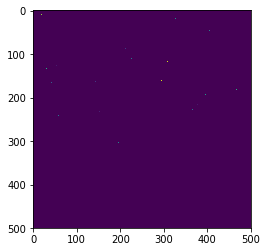

In [12]:
plt.imshow(u_init)
plt.show()

#### parameters :
* eps - time resolution
* damping - wave damping

In [13]:
eps = tf.placeholder(tf.float32, shape=())
damping = tf.placeholder(tf.float32, shape=())

In [14]:
 # create variables for simulation state
U = tf.Variable(u_init)
Ut = tf.Variable(ut_init)

In [16]:
# Discretized PDE update rules
U_ = U + eps * Ut
Ut_ = Ut + eps * (laplace(U) - damping * Ut)

In [17]:
# operation to update the state
step = tf.group(U.assign(U_),
               Ut.assign(Ut_))

In [18]:
# Initialize state to initial condition
tf.global_variables_initializer().run()

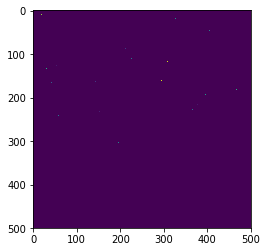

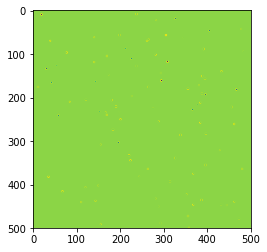

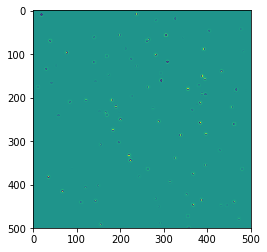

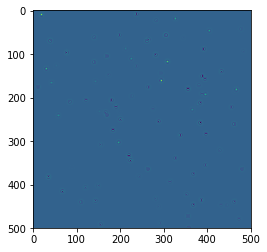

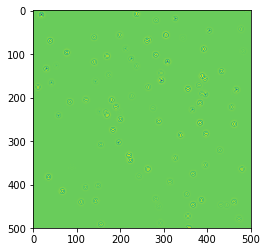

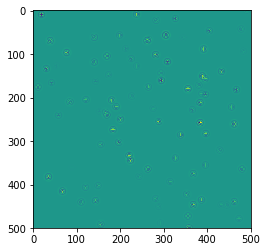

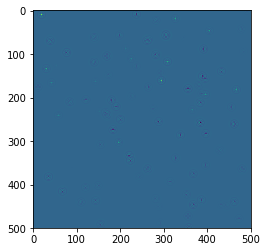

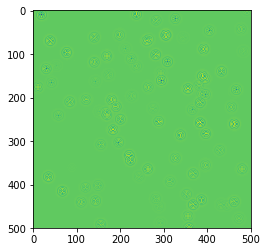

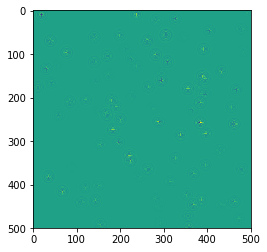

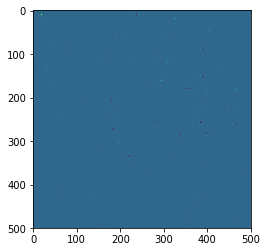

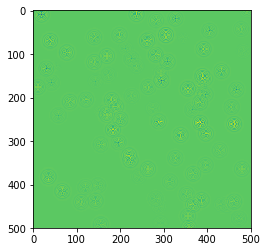

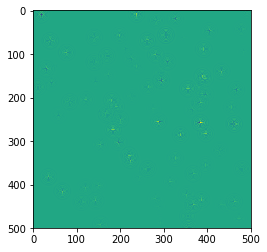

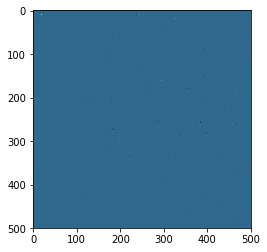

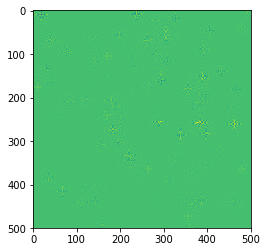

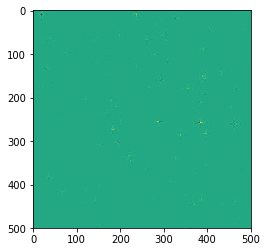

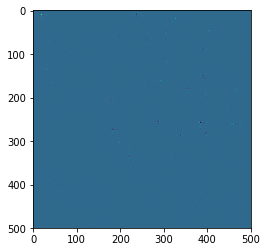

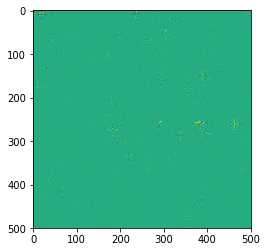

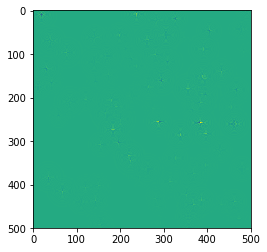

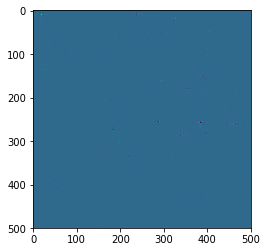

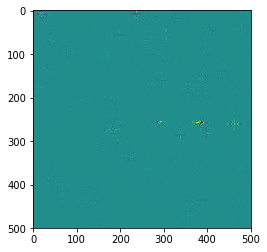

In [19]:
# run 1000 steps of PDE
for i in range(1000):
    step.run({eps: 0.03, damping: 0.04})
    # visualize every 50 steps
    if i % 50 == 0:
        plt.imshow(U.eval())
        plt.show()